<a href="https://www.kaggle.com/code/induwarailukkumbura/notebook1e8a30dfa0?scriptVersionId=268293291" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Team AIBaas

CNN Main Notebook 
Authors :
Ilukkumbura IMEIB
Nadha 
Roshelle Perera
Boralugoda

In [ ]:
!pip install pip install tensorflow keras matplotlib scikit-learn


In [ ]:
from pathlib import Path
root = Path(r"/kaggle/input/jute-pests/Dataset/Jute_Pest_Dataset")

# Print immediate children
print("Top-level folders/files:")
for p in sorted(root.iterdir()):
    print(" ", p.name)

# Find class folders in case dataset already splitted
def find_class_dirs(base):
    classes = []
    for p in base.iterdir():
        if p.is_dir():
            # heuristics: folder contains many image files
            img_count = len(list(p.glob("*.jpg"))) + len(list(p.glob("*.png")))
            if img_count > 0:
                classes.append((p.name, img_count))
    return classes

print("\nClass folders at root (name, count):")
print(find_class_dirs(root))

# Also check train/val/test subdirs
for split in ["train","val","test"]:
    s = root / split
    if s.exists():
        print(f"\nFound {split} folder with class counts:")
        print(find_class_dirs(s))


In [ ]:
import tensorflow as tf

In [ ]:
directory = r"/kaggle/input/jute-pests/Dataset/Jute_Pest_Dataset/train"
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
train_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"/kaggle/input/jute-pests/Dataset/Jute_Pest_Dataset/val"
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"/kaggle/input/jute-pests/Dataset/Jute_Pest_Dataset/test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)

# Normalize pixel values from [0,255] → [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, models

num_classes = len(train_raw.class_names)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
model.summary()

In [ ]:
model.compile(
    optimizer='adam',                         # we’ll discuss this choice later for your report
    loss='sparse_categorical_crossentropy',   # since labels are integer IDs
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)


import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Gather all predictions and true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.concatenate([np.argmax(model.predict(x), axis=1) for x, y in test_ds], axis=0)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=test_ds.class_names))



## First Trials

In [ ]:
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\train"
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
train_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\val"
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)
test_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(128, 128),  # keep small for now
    batch_size=32
)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))



# Normalize pixel values from [0,255] → [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

model2.compile(
    optimizer='adam',                         # we’ll discuss this choice later for your report
    loss='sparse_categorical_crossentropy',   # since labels are integer IDs
    metrics=['accuracy']
)


In [ ]:
history = model2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)


import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Gather all predictions and true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.concatenate([np.argmax(model.predict(x), axis=1) for x, y in test_ds], axis=0)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=test_raw.class_names))



In [ ]:
import tensorflow as tf, gc
tf.keras.backend.clear_session()
gc.collect()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\train"
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224) ,# keep small for now
    batch_size=16
)
train_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224),  # keep small for now
    batch_size=16
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\val"
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224),  # keep small for now
    batch_size=16
)
directory = r"E:\SEM5\PR\CNN\CNN\Dataset\Jute_Pest_Dataset\test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224),  # keep small for now
    batch_size=16
)
test_raw = tf.keras.utils.image_dataset_from_directory(
    directory,
    image_size=(224,224),  # keep small for now
    batch_size=16
)

data_augmentation = keras.Sequential([
    layers.RandomFlip(),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))



# Normalize pixel values from [0,255] → [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
from tensorflow.keras import layers, models

num_classes= 17
model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.BatchNormalization(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=4, verbose=1)

history = model2.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[reduce_lr])




In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_acc = model2.evaluate(test_ds)
print("Test Accuracy:", test_acc)


import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Gather all predictions and true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.concatenate([np.argmax(model2.predict(x), axis=1) for x, y in test_ds], axis=0)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=test_raw.class_names))



In [ ]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=test_raw.class_names))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Assuming you already have test_ds and model2

# Get class names (if dataset has .class_names)
class_names = test_ds.class_names if hasattr(test_ds, 'class_names') else [str(i) for i in range(model2.output_shape[-1])]

# Collect all images and labels from test_ds
images = []
labels = []
for x, y in test_ds:
    images.append(x.numpy())
    labels.append(y.numpy())
images = np.concatenate(images)
labels = np.concatenate(labels)

# Make predictions
pred_probs = model2.predict(images)
preds = np.argmax(pred_probs, axis=1)

# Plot a few samples
num_images_to_show = 25  # change this to show more or less
plt.figure(figsize=(15, 15))

for i in range(num_images_to_show):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    
    true_label = class_names[labels[i]]
    pred_label = class_names[preds[i]]
    
    if preds[i] == labels[i]:
        color = "green"
        title = f"✅ {pred_label}"
    else:
        color = "red"
        title = f"❌ Pred: {pred_label}\nTrue: {true_label}"
    
    plt.title(title, color=color, fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()


## Trial 2 with GPU

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# --- Dataset directories ---
train_dir = "/kaggle/input/jute-pests/Dataset/Jute_Pest_Dataset/train"
val_dir = "/kaggle/input/jute-pests/Dataset/Jute_Pest_Dataset/val"
test_dir = "/kaggle/input/jute-pests/Dataset/Jute_Pest_Dataset/test"

# --- Load datasets ---
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=64
)
train_raw = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=64
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=64
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=64
)
test_raw = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=64
)

data_augmentation = keras.Sequential([
    layers.RandomFlip(),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))



# Normalize pixel values from [0,255] → [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


2025-10-15 16:06:23.917541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760544384.096932      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760544384.159686      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 6443 files belonging to 17 classes.


I0000 00:00:1760544397.642229      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Found 6443 files belonging to 17 classes.
Found 413 files belonging to 17 classes.
Found 379 files belonging to 17 classes.
Found 379 files belonging to 17 classes.


In [2]:


from tensorflow.keras import layers, models, optimizers

num_classes = 17

model2 = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(512, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2,2),

    layers.GlobalAveragePooling2D(),

    layers.Dense(256, activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(num_classes, activation='softmax')
])


model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 17)             │         1,10

 Total params: 835,665 (3.19 MB)

 Trainable params: 834,065 (3.18 MB)

 Non-trainable params: 1,600 (6.25 KB)

In [3]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Extract all labels from your train_ds
all_labels = []
for _, labels in train_ds.unbatch():
    all_labels.append(labels.numpy())

all_labels = np.array(all_labels)

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_labels),
    y=all_labels
)

# Convert to dictionary
class_weights = dict(enumerate(class_weights))

print(class_weights)


{0: 1.9045226130653266, 1: 1.226537216828479, 2: 0.949874686716792, 3: 0.9668367346938775, 4: 0.7150943396226415, 5: 0.9154589371980676, 6: 0.8293216630196937, 7: 1.0188172043010753, 8: 1.3487544483985765, 9: 0.5606508875739645, 10: 1.2225806451612904, 11: 0.8133047210300429, 12: 0.9869791666666666, 13: 1.184375, 14: 1.302405498281787, 15: 1.2591362126245846, 16: 1.108187134502924}


In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)



reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)


class_weights = dict(enumerate(class_weights))

history = model2.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[early_stop, reduce_lr], class_weight=class_weights)





Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.8584 - loss: 1.2406 - val_accuracy: 0.6005 - val_loss: 2.0823 - learning_rate: 8.1000e-06
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8717 - loss: 1.0961 - val_accuracy: 0.6005 - val_loss: 2.0662 - learning_rate: 8.1000e-06
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8582 - loss: 1.1820 - val_accuracy: 0.6077 - val_loss: 2.0560 - learning_rate: 8.1000e-06
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8708 - loss: 1.1643 - val_accuracy: 0.5981 - val_loss: 2.0769 - learning_rate: 8.1000e-06
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8689 - loss: 1.1406 - val_accuracy: 0.5981 - val_loss: 2.0774 - learning_rate: 8.1000e-06
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8683 - loss: 1.1405 - val_accuracy: 0.5932 - val_loss: 2.0666 - learning_rate: 8.1000e-06
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - acc

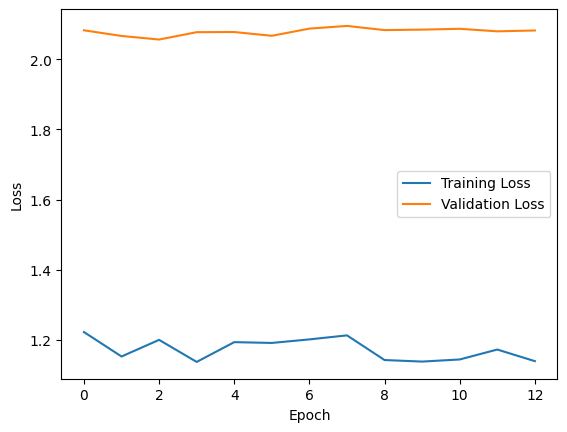

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 534ms/step - accuracy: 0.7563 - loss: 1.0617
Test Accuracy: 0.7598944306373596
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step 
Confusion Matrix:
 [[ 0  0  0  1  3  2  1  0  1  8  0  2  1  0  0  0  1]
 [ 0  5  0  6  2  2  1  0  0  3  0  0  0  1  0  0  0]
 [ 0  1  7  2  0  0  1  0  0  5  0  2  0  0  0  0  2]
 [ 0  0  0 17  0  0  0  0  0  2  0  0  0  0  0  0  1]
 [ 0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  8]
 [ 0  0  2  0  0 17  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0 17  0  0  0  1  2  2  0  0  1  0]
 [ 0  0  0  0  0  9  0 10  0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  1  2  0  1  0  0  0 19  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  1  0  0  2  1 18  0  0  0  0  0]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_acc = model2.evaluate(test_ds)
print("Test Accuracy:", test_acc)


import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Gather all predictions and true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.concatenate([np.argmax(model2.predict(x), axis=1) for x, y in test_ds], axis=0)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=test_raw.class_names))



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/tmp/ipykernel_37/567674841.py:44: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_37/567674841.py:44: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


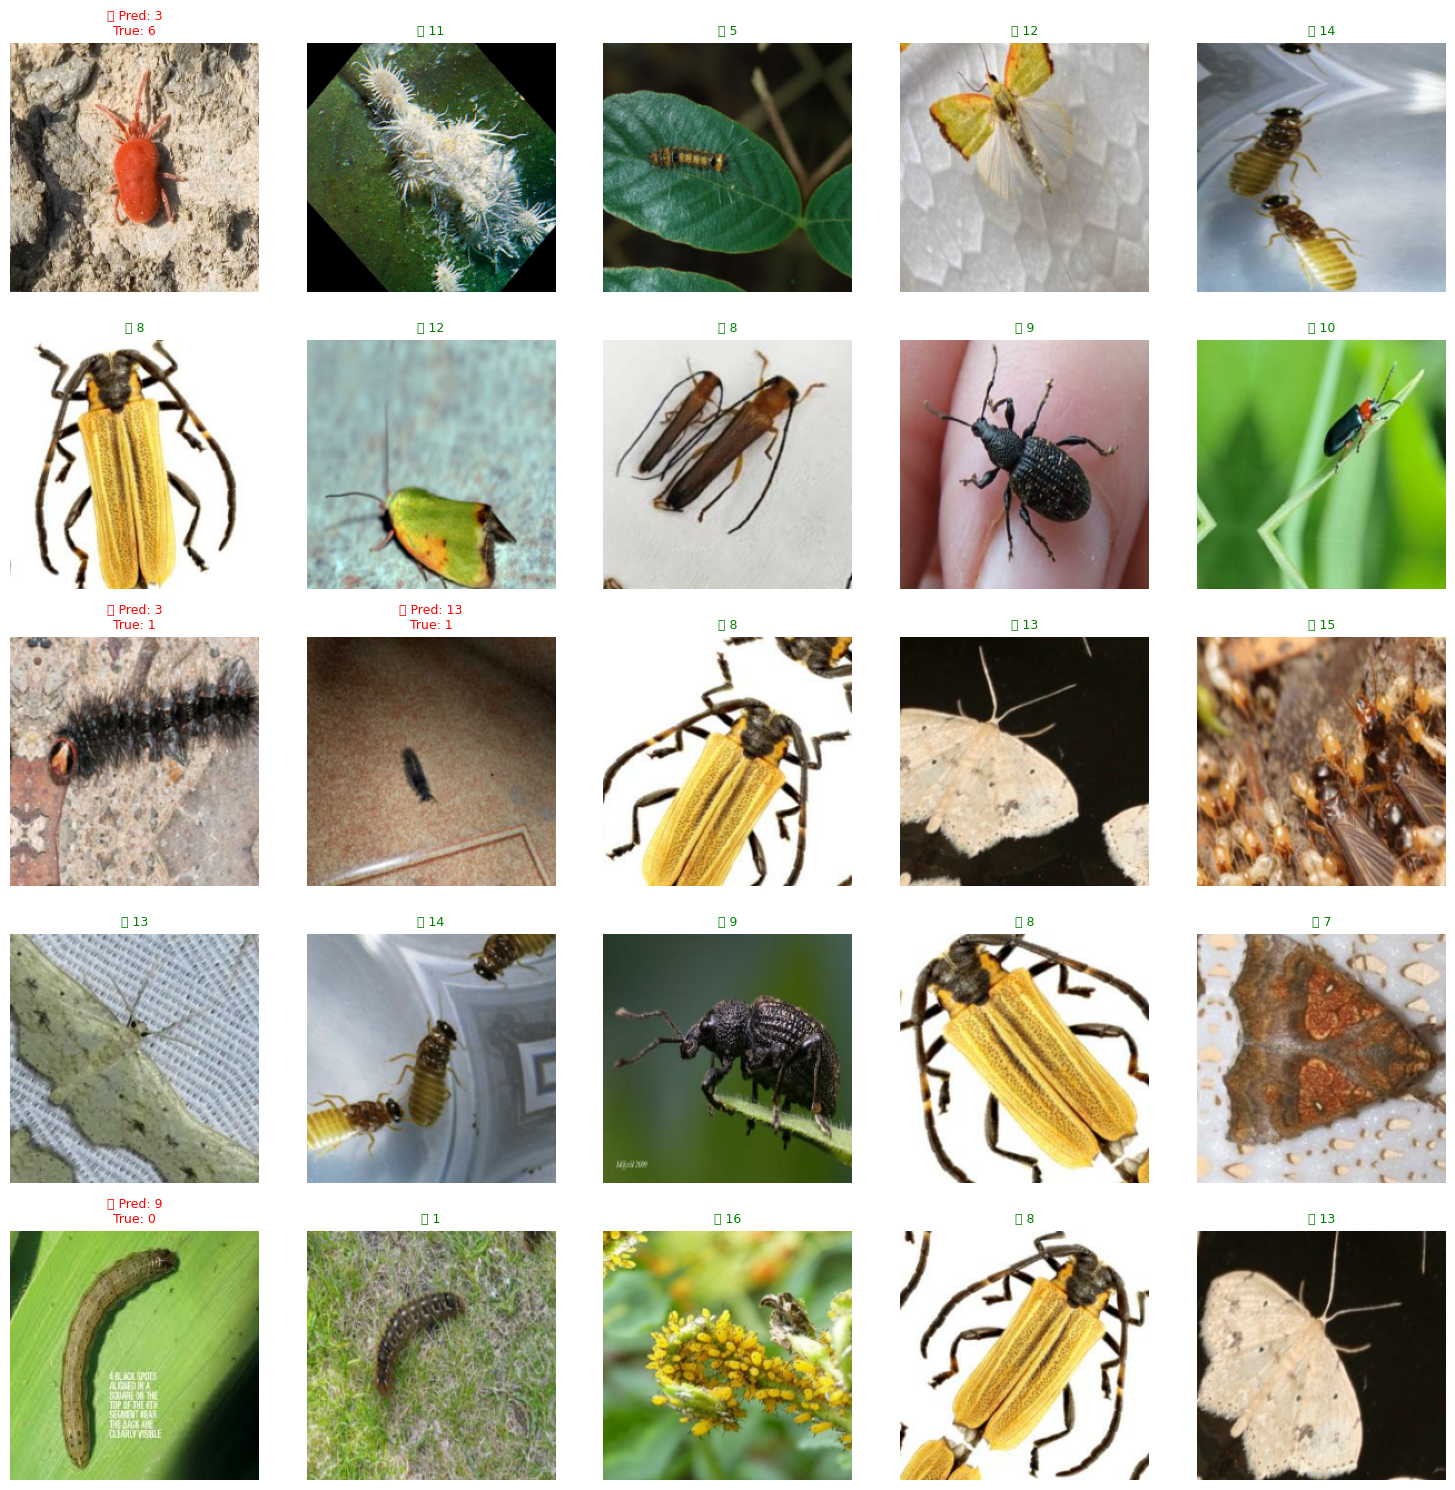

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Assuming you already have test_ds and model2

# Get class names (if dataset has .class_names)
class_names = test_ds.class_names if hasattr(test_ds, 'class_names') else [str(i) for i in range(model2.output_shape[-1])]

# Collect all images and labels from test_ds
images = []
labels = []
for x, y in test_ds:
    images.append(x.numpy())
    labels.append(y.numpy())
images = np.concatenate(images)
labels = np.concatenate(labels)

# Make predictions
pred_probs = model2.predict(images)
preds = np.argmax(pred_probs, axis=1)

# Plot a few samples
num_images_to_show = 25  # change this to show more or less
plt.figure(figsize=(15, 15))

for i in range(num_images_to_show):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    
    true_label = class_names[labels[i]]
    pred_label = class_names[preds[i]]
    
    if preds[i] == labels[i]:
        color = "green"
        title = f"✅ {pred_label}"
    else:
        color = "red"
        title = f"❌ Pred: {pred_label}\nTrue: {true_label}"
    
    plt.title(title, color=color, fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Total misclassified samples: 91


/tmp/ipykernel_37/2529387038.py:41: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  plt.tight_layout()


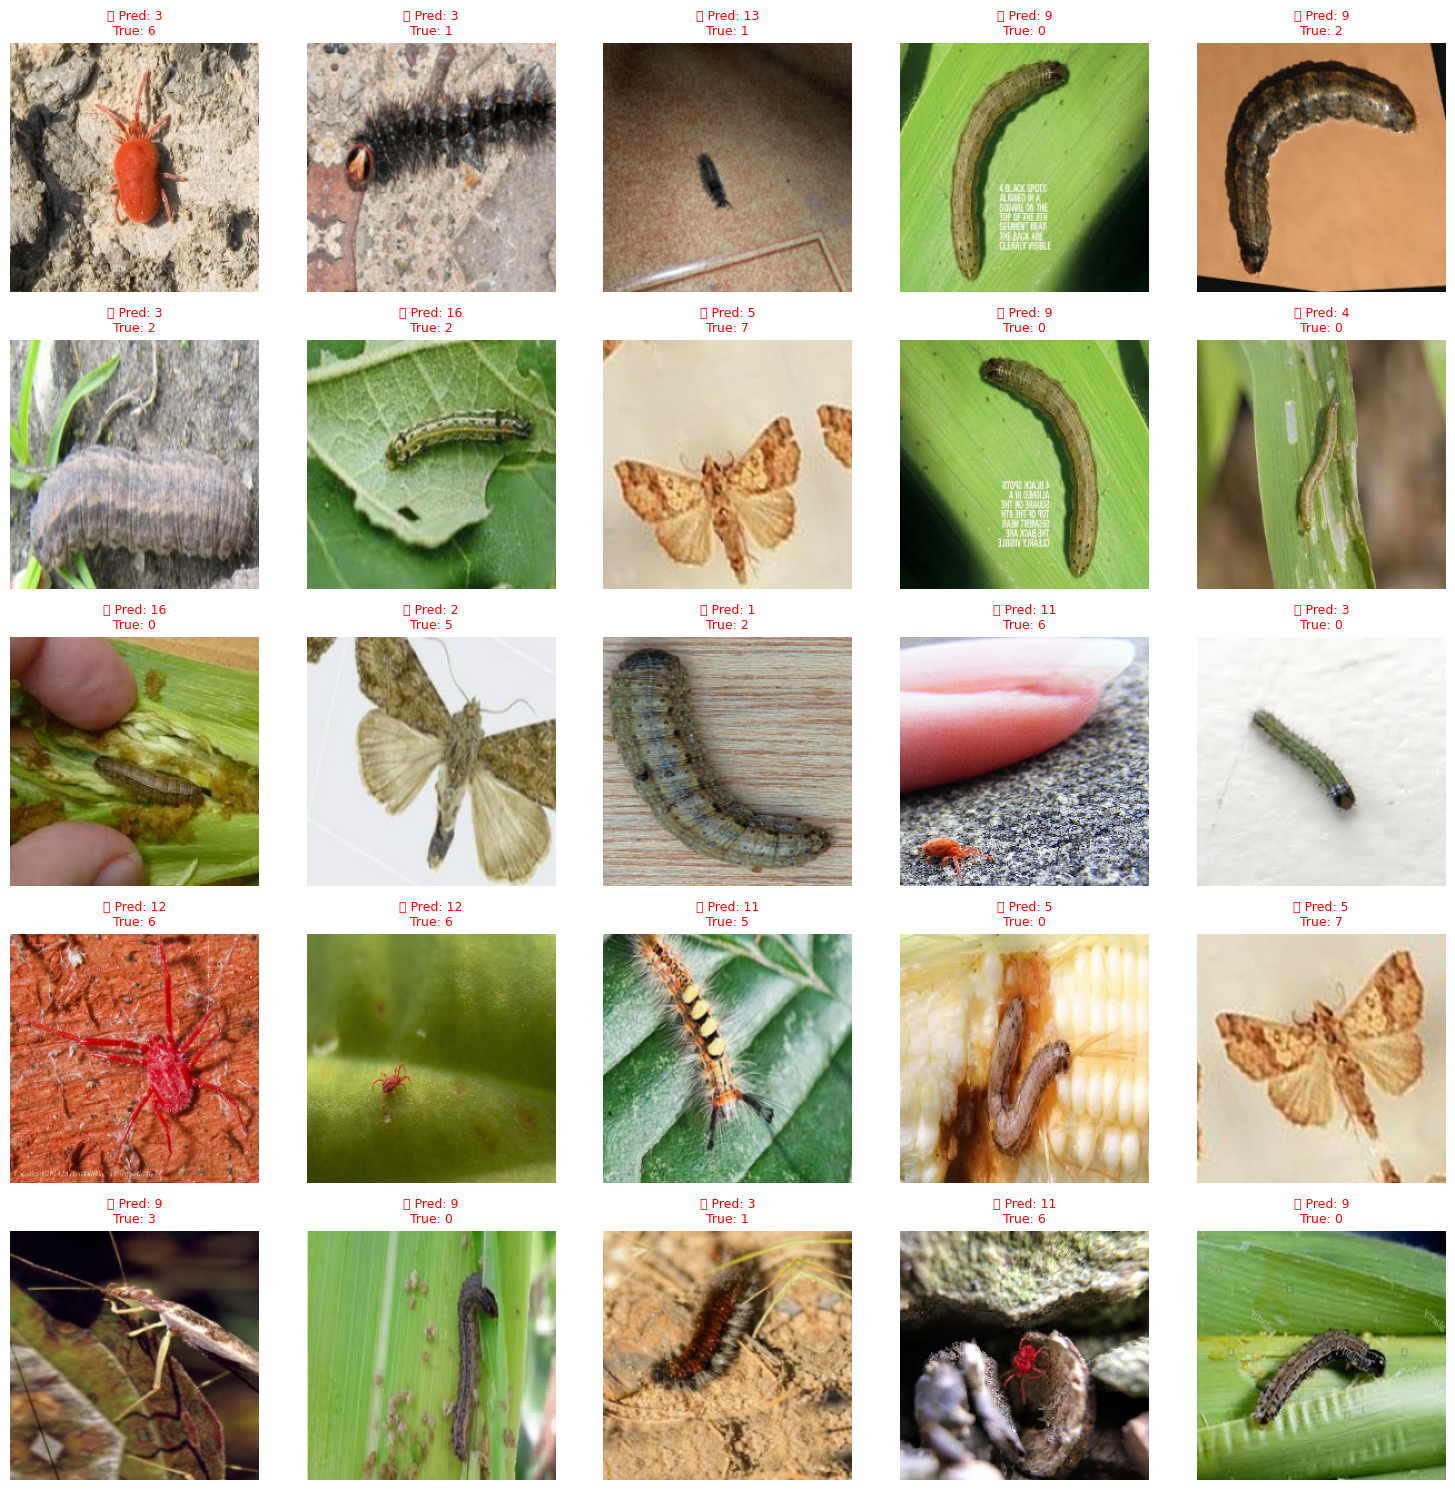

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Get class names (if dataset has .class_names)
class_names = test_ds.class_names if hasattr(test_ds, 'class_names') else [str(i) for i in range(model2.output_shape[-1])]

# Collect all images and labels from test_ds
images = []
labels = []
for x, y in test_ds:
    images.append(x.numpy())
    labels.append(y.numpy())
images = np.concatenate(images)
labels = np.concatenate(labels)

# Make predictions
pred_probs = model2.predict(images)
preds = np.argmax(pred_probs, axis=1)

# Find wrong predictions
wrong_indices = np.where(preds != labels)[0]
print(f"Total misclassified samples: {len(wrong_indices)}")

# Limit number of wrong images to display
num_images_to_show = min(25, len(wrong_indices))

plt.figure(figsize=(15, 15))

for i, idx in enumerate(wrong_indices[:num_images_to_show]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[idx])

    true_label = class_names[labels[idx]]
    pred_label = class_names[preds[idx]]

    title = f"❌ Pred: {pred_label}\nTrue: {true_label}"
    plt.title(title, color="red", fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()
